In [146]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import StandardScaler, label_binarize
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from tabulate import tabulate

In [3]:
merged_df = pd.read_csv("merged_df.csv")

In [4]:
merged_df.head()

,SHA256,Type,advapi32.dll,kernel32.dll,user32.dll,gdi32.dll,mscoree.dll,Type_header,e_lfanew,NumberOfSections,...,rdata_Characteristics,rsrc_Misc_VirtualSize,rsrc_VirtualAddress,rsrc_SizeOfRawData,rsrc_PointerToRawData,reloc_Misc_VirtualSize,reloc_VirtualAddress,reloc_SizeOfRawData,reloc_PointerToRawData,reloc_Characteristics
0,002ce0d28ec990aadbbc89df457189de37d8adaadc9c08...,0,1,1,0,0,0,0,264,6,...,1073741888,1488,401408,1536,378368,4836,405504,5120,379904,1107296320
1,2a053f32b1d48539e3e2807f86754be87ce95b08378467...,0,1,1,0,0,0,0,240,5,...,0,11604,229376,11776,68608,6068,241664,6144,80384,1107296320
2,2f031a1752f7067fb9f483ae0ac5f3036c9b66cc4af40e...,0,1,1,1,0,0,0,232,7,...,1073741888,4920,45056,5120,29696,204,53248,512,34816,1107296320
3,308e8bb2e8a3b67607d2454370e0b50147b42049bda813...,0,1,1,1,0,0,0,312,5,...,0,2088,86016,2560,69632,562,90112,1024,72192,1107296320
4,31aaba443b9869e6e68c17125f8d7989cbd762fb38ae3a...,0,1,1,0,0,0,0,256,6,...,0,1476,110592,1536,98816,8230,114688,8704,100352,1107296320


In [105]:
merged_df.describe()

,Type,advapi32.dll,kernel32.dll,user32.dll,gdi32.dll,mscoree.dll,Type_header,e_lfanew,NumberOfSections,TimeDateStamp,...,rdata_Characteristics,rsrc_Misc_VirtualSize,rsrc_VirtualAddress,rsrc_SizeOfRawData,rsrc_PointerToRawData,reloc_Misc_VirtualSize,reloc_VirtualAddress,reloc_SizeOfRawData,reloc_PointerToRawData,reloc_Characteristics
count,29495.000000,29495.000000,29495.000000,29495.000000,29495.000000,29495.000000,29495.000000,29495.000000,29495.000000,2.949500e+04,...,2.949500e+04,2.949500e+04,2.949500e+04,2.949500e+04,2.949500e+04,2.949500e+04,2.949500e+04,2.949500e+04,2.949500e+04,2.949500e+04
mean,3.145821,0.224614,0.494931,0.378369,0.260315,0.419427,3.145821,174.328395,4.131073,1.662602e+09,...,3.652089e+08,9.670177e+04,1.622664e+06,9.163336e+04,3.984005e+05,2.531234e+03,6.293829e+05,2.256200e+03,3.137584e+05,5.980715e+08
std,1.806536,0.417335,0.499983,0.484989,0.438814,0.493474,1.806536,53.047495,2.091788,6.442974e+08,...,6.569207e+08,4.144518e+05,6.616418e+06,3.953421e+05,7.921982e+05,1.704802e+04,3.450912e+06,1.219939e+04,7.449967e+05,6.171947e+08
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000,2.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,128.000000,3.000000,1.509547e+09,...,0.000000e+00,1.516000e+03,7.782400e+04,1.536000e+03,3.635200e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,128.000000,3.000000,1.609349e+09,...,0.000000e+00,8.164000e+03,2.990080e+05,8.192000e+03,2.186240e+05,1.200000e+01,3.686400e+04,5.120000e+02,2.048000e+04,1.107296e+09
75%,5.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.000000,224.000000,5.000000,1.645113e+09,...,1.073742e+09,7.643300e+04,7.208960e+05,7.168000e+04,5.222400e+05,1.200000e+01,5.980160e+05,5.120000e+02,5.038080e+05,1.107296e+09
max,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,512.000000,49.000000,4.294967e+09,...,3.758096e+09,2.525594e+07,1.225605e+08,2.525645e+07,3.380019e+07,1.896448e+06,1.225851e+08,1.241088e+06,3.417498e+07,3.791651e+09


In [8]:
X = merged_df.drop(columns=['SHA256', 'Type'])
y = merged_df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Tras hacer algunas pruebas con las predicciones se decide escalar los datos, algunos modelos son sensibles cuando las diferencias en la escala es significativa
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Para los modelos que no cuentan con parámetro de balanceo de clases
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

In [10]:
def evaluar_modelo(modelo, X_train, y_train, X_test, y_test, nombre=''):
    print(f"\n--- Evaluación del modelo: {nombre} ---")

    # Medir tiempo de entrenamiento
    start_train = time.time()
    modelo.fit(X_train, y_train)
    train_time = time.time() - start_train

    # Medir tiempo de predicción
    start_pred = time.time()
    y_pred = modelo.predict(X_test)
    pred_time = time.time() - start_pred

    # Métricas
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(f"Tiempo de entrenamiento: {train_time:.2f}s")
    print(f"Tiempo de predicción: {pred_time:.2f}s")

    print("\nClassification report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    return {
        'accuracy': acc,
        'train_time': train_time,
        'predict_time': pred_time
    }

## Logistic Regression

In [151]:
lr_model_wo = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=1000)

lr_model_wo.fit(X_train, y_train)

lr_y_pred_wo = lr_model_wo.predict(X_test)

print(" Accuracy:", accuracy_score(y_test, lr_y_pred_wo))
print("\n Classification Report:\n", classification_report(y_test, lr_y_pred_wo))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, lr_y_pred_wo))

 Accuracy: 0.41396846923207326

 Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.25      0.21       375
           1       0.59      0.69      0.64      1004
           2       0.52      0.68      0.59       929
           3       0.27      0.08      0.12       991
           4       0.49      0.25      0.33      1015
           5       0.31      0.05      0.08       845
           6       0.32      0.88      0.47       740

    accuracy                           0.41      5899
   macro avg       0.38      0.41      0.35      5899
weighted avg       0.41      0.41      0.36      5899


 Confusion Matrix:
 [[ 95  20  69 127   3   7  54]
 [ 51 695 201  23  22   1  11]
 [ 62 178 630  25  34   0   0]
 [114  14 102  79 198  23 461]
 [174 263 118  28 256  23 153]
 [ 24   4  60   7   3  39 708]
 [ 15   0  37   7   2  31 648]]


C:\Users\lcgsa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [110]:
lr_model = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=1000)

lr_model.fit(X_train_scaled, y_train)

lr_y_pred = lr_model.predict(X_test_scaled)

print(" Accuracy:", accuracy_score(y_test, lr_y_pred))
print("\n Classification Report:\n", classification_report(y_test, lr_y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, lr_y_pred))

 Accuracy: 0.9986438379386336

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00      1004
           2       1.00      1.00      1.00       929
           3       1.00      1.00      1.00       991
           4       1.00      1.00      1.00      1015
           5       1.00      1.00      1.00       845
           6       1.00      1.00      1.00       740

    accuracy                           1.00      5899
   macro avg       1.00      1.00      1.00      5899
weighted avg       1.00      1.00      1.00      5899


 Confusion Matrix:
 [[ 374    1    0    0    0    0    0]
 [   0 1001    3    0    0    0    0]
 [   0    2  927    0    0    0    0]
 [   0    1    1  989    0    0    0]
 [   0    0    0    0 1015    0    0]
 [   0    0    0    0    0  845    0]
 [   0    0    0    0    0    0  740]]


In [152]:
result_baseline = evaluar_modelo(lr_model_wo, X_train, y_train, X_test, y_test, "Sin escalado")
result_preproc  = evaluar_modelo(lr_model, X_train_scaled, y_train, X_test_scaled, y_test, "Con escalado")

# Comparativa rápida
print("\n--- Comparación ---")
for key in result_baseline:
    diff = result_preproc[key] - result_baseline[key]
    print(f"{key}: sin = {result_baseline[key]:.4f}, con = {result_preproc[key]:.4f}, diferencia = {diff:+.4f}")



--- Evaluación del modelo: Sin escalado ---


C:\Users\lcgsa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.4140
Tiempo de entrenamiento: 17.36s
Tiempo de predicción: 0.01s

Classification report:
              precision    recall  f1-score   support

           0       0.18      0.25      0.21       375
           1       0.59      0.69      0.64      1004
           2       0.52      0.68      0.59       929
           3       0.27      0.08      0.12       991
           4       0.49      0.25      0.33      1015
           5       0.31      0.05      0.08       845
           6       0.32      0.88      0.47       740

    accuracy                           0.41      5899
   macro avg       0.38      0.41      0.35      5899
weighted avg       0.41      0.41      0.36      5899


Confusion matrix:
[[ 95  20  69 127   3   7  54]
 [ 51 695 201  23  22   1  11]
 [ 62 178 630  25  34   0   0]
 [114  14 102  79 198  23 461]
 [174 263 118  28 256  23 153]
 [ 24   4  60   7   3  39 708]
 [ 15   0  37   7   2  31 648]]

--- Evaluación del modelo: Con escalado ---
Accuracy: 0.9986
Tie

##  K-Nearest Neighbors (KNN)

In [113]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_balanced, y_train_balanced)

knn_y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, knn_y_pred))
print("Classification Report:\n", classification_report(y_test, knn_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_y_pred))

Accuracy: 0.9791490083064927
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       375
           1       0.98      0.98      0.98      1004
           2       0.98      0.99      0.98       929
           3       0.97      0.97      0.97       991
           4       0.98      0.96      0.97      1015
           5       0.99      0.98      0.99       845
           6       0.99      0.99      0.99       740

    accuracy                           0.98      5899
   macro avg       0.98      0.98      0.98      5899
weighted avg       0.98      0.98      0.98      5899

Confusion Matrix:
 [[367   4   2   2   0   0   0]
 [ 13 984   3   2   2   0   0]
 [  1   5 917   4   2   0   0]
 [  3   2   6 966  11   3   0]
 [  0   8   5  17 978   6   1]
 [  1   0   0   1   6 832   5]
 [  0   0   0   2   3   3 732]]


## Decision Tree Classifier

In [115]:
dt_model = DecisionTreeClassifier(class_weight='balanced')
dt_model.fit(X_train_scaled, y_train)

dt_y_pred = dt_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, dt_y_pred))
print("Classification Report:\n", classification_report(y_test, dt_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00      1004
           2       1.00      1.00      1.00       929
           3       1.00      1.00      1.00       991
           4       1.00      1.00      1.00      1015
           5       1.00      1.00      1.00       845
           6       1.00      1.00      1.00       740

    accuracy                           1.00      5899
   macro avg       1.00      1.00      1.00      5899
weighted avg       1.00      1.00      1.00      5899

Confusion Matrix:
 [[ 375    0    0    0    0    0    0]
 [   0 1004    0    0    0    0    0]
 [   0    0  929    0    0    0    0]
 [   0    0    0  991    0    0    0]
 [   0    0    0    0 1015    0    0]
 [   0    0    0    0    0  845    0]
 [   0    0    0    0    0    0  740]]


## Random Forest

In [117]:
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

rf_y_pred = rf_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Classification Report:\n", classification_report(y_test, rf_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))

Accuracy: 0.9996609594846584
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00      1004
           2       1.00      1.00      1.00       929
           3       1.00      1.00      1.00       991
           4       1.00      1.00      1.00      1015
           5       1.00      1.00      1.00       845
           6       1.00      1.00      1.00       740

    accuracy                           1.00      5899
   macro avg       1.00      1.00      1.00      5899
weighted avg       1.00      1.00      1.00      5899

Confusion Matrix:
 [[ 375    0    0    0    0    0    0]
 [   0 1004    0    0    0    0    0]
 [   0    0  929    0    0    0    0]
 [   0    0    0  990    1    0    0]
 [   0    0    0    0 1015    0    0]
 [   0    0    0    0    0  845    0]
 [   0    0    0    0    0    1  739]]


## Gradient Boosting

In [119]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_balanced, y_train_balanced)

gb_y_pred = gb_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, gb_y_pred))
print("Classification Report:\n", classification_report(y_test, gb_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00      1004
           2       1.00      1.00      1.00       929
           3       1.00      1.00      1.00       991
           4       1.00      1.00      1.00      1015
           5       1.00      1.00      1.00       845
           6       1.00      1.00      1.00       740

    accuracy                           1.00      5899
   macro avg       1.00      1.00      1.00      5899
weighted avg       1.00      1.00      1.00      5899

Confusion Matrix:
 [[ 375    0    0    0    0    0    0]
 [   0 1004    0    0    0    0    0]
 [   0    0  929    0    0    0    0]
 [   0    0    0  991    0    0    0]
 [   0    0    0    0 1015    0    0]
 [   0    0    0    0    0  845    0]
 [   0    0    0    0    0    0  740]]


El coste temporal de este modelo es elevado porque tiene que llegar al punto de convergencia -- comprobar esta información. Se descarta como posible modelo ya que tneemos otros que clasifican igual de bien y no suponen un coste temporal alto.

Además, este modelo tiende a sobreajustarse con mucha facilidad.

## SVM (SVC)

In [122]:
svc_model = SVC(class_weight='balanced', decision_function_shape='ovo')
svc_model.fit(X_train_scaled, y_train)

svc_y_pred = svc_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, svc_y_pred))
print("Classification Report:\n", classification_report(y_test, svc_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svc_y_pred))

Accuracy: 0.995083912527547
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       375
           1       1.00      1.00      1.00      1004
           2       1.00      1.00      1.00       929
           3       0.99      0.99      0.99       991
           4       0.98      0.99      0.99      1015
           5       1.00      1.00      1.00       845
           6       1.00      1.00      1.00       740

    accuracy                           1.00      5899
   macro avg       1.00      1.00      1.00      5899
weighted avg       1.00      1.00      1.00      5899

Confusion Matrix:
 [[ 373    0    0    0    2    0    0]
 [   2 1000    0    0    2    0    0]
 [   0    0  929    0    0    0    0]
 [   0    0    0  979   11    1    0]
 [   0    0    0    5 1008    2    0]
 [   0    0    0    0    2  843    0]
 [   0    0    0    0    1    1  738]]


## Neural Network (MLPClassifier)

In [124]:
MLPClassifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
MLPClassifier.fit(X_train_balanced, y_train_balanced)

mlpc_y_pred = MLPClassifier.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, mlpc_y_pred))
print("Classification Report:\n", classification_report(y_test, mlpc_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, mlpc_y_pred))

Accuracy: 0.9988133581963045
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00      1004
           2       1.00      1.00      1.00       929
           3       1.00      1.00      1.00       991
           4       1.00      1.00      1.00      1015
           5       1.00      1.00      1.00       845
           6       1.00      1.00      1.00       740

    accuracy                           1.00      5899
   macro avg       1.00      1.00      1.00      5899
weighted avg       1.00      1.00      1.00      5899

Confusion Matrix:
 [[ 374    1    0    0    0    0    0]
 [   0 1003    1    0    0    0    0]
 [   0    1  928    0    0    0    0]
 [   0    0    1  989    1    0    0]
 [   0    0    0    1 1014    0    0]
 [   0    0    0    0    0  845    0]
 [   0    0    0    0    0    1  739]]


## Comparación entre modelos

In [157]:
models = ["Logistic Regression",
          "K-Nearest Neighbors",
          "Decision Tree",
          "Random Forest",
          "Gradient Boosting",
          "Support Vector Classifier",
          "Neural Network"
         ]


accuracy = [accuracy_score(y_test, lr_y_pred),
            accuracy_score(y_test, knn_y_pred),
            accuracy_score(y_test, dt_y_pred),
            accuracy_score(y_test, rf_y_pred),
            accuracy_score(y_test, gb_y_pred),
            accuracy_score(y_test, svc_y_pred),
            accuracy_score(y_test, mlpc_y_pred)
           ]

results = pd.DataFrame()
results['Model'] = models
results['Accuracy'] = accuracy

In [159]:
results_sorted = results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print(results_sorted)

                       Model  Accuracy
0              Decision Tree  1.000000
1          Gradient Boosting  1.000000
2              Random Forest  0.999661
3             Neural Network  0.998813
4        Logistic Regression  0.998644
5  Support Vector Classifier  0.995084
6        K-Nearest Neighbors  0.979149


Las conclusiones y valores en las métricas obtenidos se obtienen eliminando las variables con más de un 80% de valores idénticos.

Además, al revisar las matrices de confusión y el resto de métricas, podemos confirmar una primera hipótesis de que los modelos con mayor accuracy están sobreajustándose a los datos, por lo que no son buenos modelos para la predicción de futuros malwares. El objetivo es encontrar uno que generalice y nos permita identificar malware desconocido.

| Modelo                | Accuracy | ¿Signs of Overfitting? | Comentario                                                                                      |
| --------------------- | -------- | ---------------------- | ----------------------------------------------------------------------------------------------- |
| **Gradient Boosting** | 1.000    | Sí                     | Perfecto en test = sospechoso. GB puede sobreajustarse con facilidad si no se regulariza.       |
| **Decision Tree**     | 1.000    | Sí                     | Árboles puros tienden a sobreajustar. Exactitud perfecta = probablemente *memoriza*.            |
| **Random Forest**     | 0.998    | Ligeramente            | Muy buen desempeño, pero aún podría estar cerca del overfitting si tiene árboles muy profundos. |
| **MLP (Neural Net)**  | 0.997    | Leve                   | Buen resultado, pero sin regularización puede sobreajustar. Métricas balanceadas.               |
| **Logistic Reg.**     | 0.996    | No                     | Métricas altas, con errores leves. Generaliza bien.                                             |
| **SVC**               | 0.990    | No                     | Buen desempeño, errores leves, buena generalización.                                            |
| **KNN**               | 0.975    | No                     | Métricas buenas pero no tan altas. Su error es más realista. Buena generalización.              |


### Conclusión

| Modelo            | Ventajas                                                                    |
| ----------------- | --------------------------------------------------------------------------- |
| **Random Forest** | Muy robusto, resistente a outliers, buen rendimiento, poco tuning.          |
| **SVC**           | Generaliza muy bien, con buen desempeño balanceado entre clases.            |
| **LogisticReg**   | Rápido, interpretable, métricas sólidas. Ideal si buscas interpretabilidad. |


## Midiendo el impacto del preprocesamiento en el modelo

### Comparando accuracy y tiempos de entrenamiento y test

In [14]:
lr_model_woo = LogisticRegression(solver='lbfgs', max_iter=1000)

lr_model_woo.fit(X_train, y_train)

lr_y_pred_woo = lr_model_woo.predict(X_test)

print(" Accuracy:", accuracy_score(y_test, lr_y_pred_woo))
print("\n Classification Report:\n", classification_report(y_test, lr_y_pred_woo))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, lr_y_pred_woo))

 Accuracy: 0.48058993049669435

 Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.06      0.09       375
           1       0.60      0.72      0.66      1004
           2       0.53      0.71      0.60       929
           3       0.39      0.49      0.43       991
           4       0.53      0.31      0.40      1015
           5       0.41      0.74      0.53       845
           6       0.60      0.01      0.02       740

    accuracy                           0.48      5899
   macro avg       0.47      0.43      0.39      5899
weighted avg       0.49      0.48      0.43      5899


 Confusion Matrix:
 [[ 22  20  73 223   7  30   0]
 [ 16 726 200  39  16   7   0]
 [  2 167 656  62  42   0   0]
 [ 12   5 104 484 210 176   0]
 [ 49 279 111 168 319  89   0]
 [  2   4  60 151   2 622   4]
 [  6   0  37 112   1 578   6]]


C:\Users\lcgsa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
lr_model_wo = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=1000)

lr_model_wo.fit(X_train, y_train)

lr_y_pred_wo = lr_model_wo.predict(X_test)

print(" Accuracy:", accuracy_score(y_test, lr_y_pred_wo))
print("\n Classification Report:\n", classification_report(y_test, lr_y_pred_wo))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, lr_y_pred_wo))

 Accuracy: 0.41396846923207326

 Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.25      0.21       375
           1       0.59      0.69      0.64      1004
           2       0.52      0.68      0.59       929
           3       0.27      0.08      0.12       991
           4       0.49      0.25      0.33      1015
           5       0.31      0.05      0.08       845
           6       0.32      0.88      0.47       740

    accuracy                           0.41      5899
   macro avg       0.38      0.41      0.35      5899
weighted avg       0.41      0.41      0.36      5899


 Confusion Matrix:
 [[ 95  20  69 127   3   7  54]
 [ 51 695 201  23  22   1  11]
 [ 62 178 630  25  34   0   0]
 [114  14 102  79 198  23 461]
 [174 263 118  28 256  23 153]
 [ 24   4  60   7   3  39 708]
 [ 15   0  37   7   2  31 648]]


C:\Users\lcgsa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
lr_model = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=1000)

lr_model.fit(X_train_scaled, y_train)

lr_y_pred = lr_model.predict(X_test_scaled)

print(" Accuracy:", accuracy_score(y_test, lr_y_pred))
print("\n Classification Report:\n", classification_report(y_test, lr_y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, lr_y_pred))

 Accuracy: 0.9986438379386336

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00      1004
           2       1.00      1.00      1.00       929
           3       1.00      1.00      1.00       991
           4       1.00      1.00      1.00      1015
           5       1.00      1.00      1.00       845
           6       1.00      1.00      1.00       740

    accuracy                           1.00      5899
   macro avg       1.00      1.00      1.00      5899
weighted avg       1.00      1.00      1.00      5899


 Confusion Matrix:
 [[ 374    1    0    0    0    0    0]
 [   0 1001    3    0    0    0    0]
 [   0    2  927    0    0    0    0]
 [   0    1    1  989    0    0    0]
 [   0    0    0    0 1015    0    0]
 [   0    0    0    0    0  845    0]
 [   0    0    0    0    0    0  740]]


In [24]:
result_woo = evaluar_modelo(lr_model_woo, X_train, y_train, X_test, y_test, "Sin escalado ni balanceo de clases")
result_wo = evaluar_modelo(lr_model_wo, X_train, y_train, X_test, y_test, "Sin escalado")
result_scaled = evaluar_modelo(lr_model, X_train_scaled, y_train, X_test_scaled, y_test, "Con escalado")

# Comparativa rápida
print("\n--- Comparación de modelos ---")
print(f"{'Métrica':<15} {'Sin esc/bal':<12} {'Sin esc':<12} {'Con esc':<12}")

for key in result_scaled:
    val_woo = result_woo[key]
    val_wo  = result_wo[key]
    val_scaled = result_scaled[key]
    print(f"{key:<15} {val_woo:<12.4f} {val_wo:<12.4f} {val_scaled:<12.4f}")



--- Evaluación del modelo: Sin escalado ni balanceo de clases ---


C:\Users\lcgsa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.4806
Tiempo de entrenamiento: 16.11s
Tiempo de predicción: 0.01s

Classification report:
              precision    recall  f1-score   support

           0       0.20      0.06      0.09       375
           1       0.60      0.72      0.66      1004
           2       0.53      0.71      0.60       929
           3       0.39      0.49      0.43       991
           4       0.53      0.31      0.40      1015
           5       0.41      0.74      0.53       845
           6       0.60      0.01      0.02       740

    accuracy                           0.48      5899
   macro avg       0.47      0.43      0.39      5899
weighted avg       0.49      0.48      0.43      5899


Confusion matrix:
[[ 22  20  73 223   7  30   0]
 [ 16 726 200  39  16   7   0]
 [  2 167 656  62  42   0   0]
 [ 12   5 104 484 210 176   0]
 [ 49 279 111 168 319  89   0]
 [  2   4  60 151   2 622   4]
 [  6   0  37 112   1 578   6]]

--- Evaluación del modelo: Sin escalado ---


C:\Users\lcgsa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.4140
Tiempo de entrenamiento: 19.44s
Tiempo de predicción: 0.01s

Classification report:
              precision    recall  f1-score   support

           0       0.18      0.25      0.21       375
           1       0.59      0.69      0.64      1004
           2       0.52      0.68      0.59       929
           3       0.27      0.08      0.12       991
           4       0.49      0.25      0.33      1015
           5       0.31      0.05      0.08       845
           6       0.32      0.88      0.47       740

    accuracy                           0.41      5899
   macro avg       0.38      0.41      0.35      5899
weighted avg       0.41      0.41      0.36      5899


Confusion matrix:
[[ 95  20  69 127   3   7  54]
 [ 51 695 201  23  22   1  11]
 [ 62 178 630  25  34   0   0]
 [114  14 102  79 198  23 461]
 [174 263 118  28 256  23 153]
 [ 24   4  60   7   3  39 708]
 [ 15   0  37   7   2  31 648]]

--- Evaluación del modelo: Con escalado ---
Accuracy: 0.9986
Tie

In [26]:
comparativa_df = pd.DataFrame({
    'Sin escalado ni balanceo': result_woo,
    'Sin escalado': result_wo,
    'Con escalado': result_scaled
})

print(comparativa_df)

              Sin escalado ni balanceo  Sin escalado  Con escalado
accuracy                      0.480590      0.413968      0.998644
train_time                   16.105960     19.438999      2.118163
predict_time                  0.008169      0.009629      0.004704


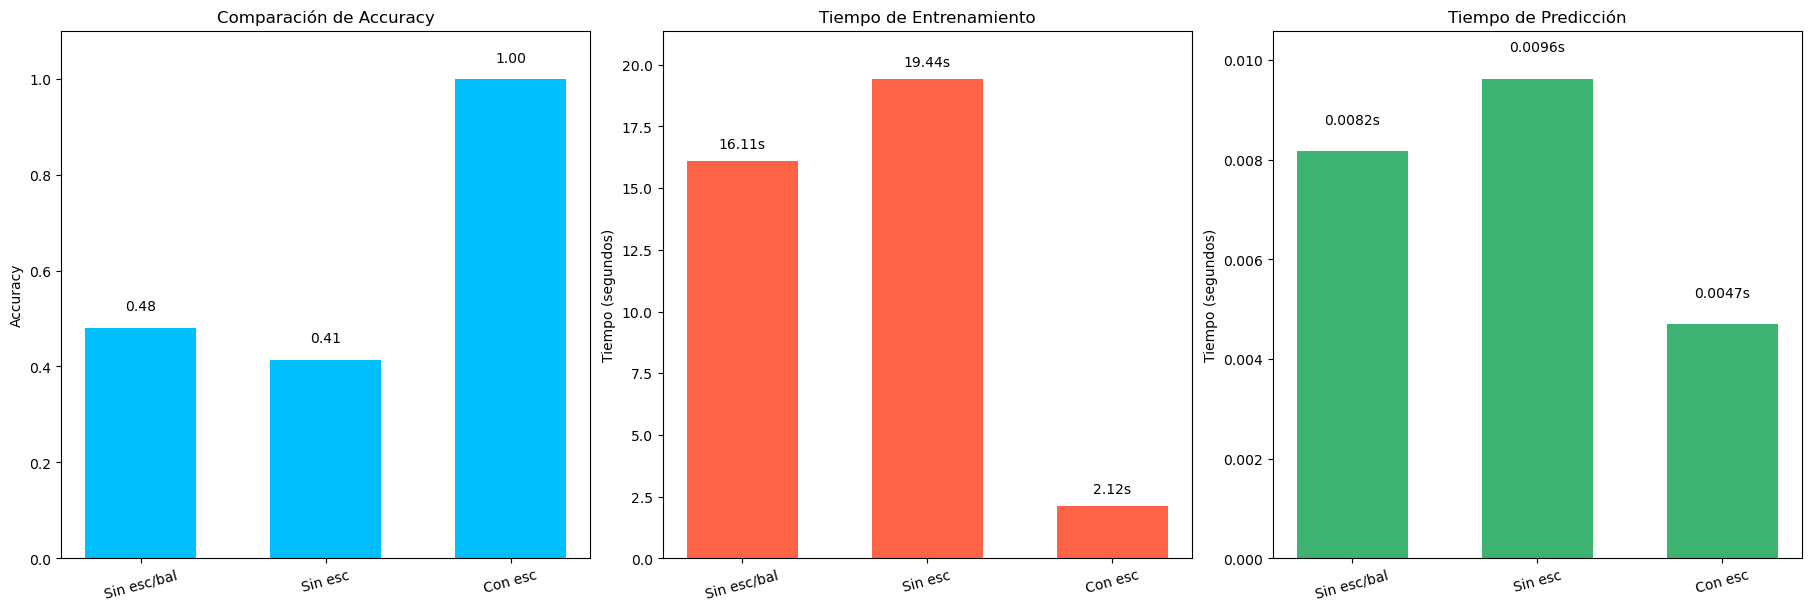

In [96]:
labels = ['Sin esc/bal', 'Sin esc', 'Con esc']
accuracy = [result_woo['accuracy'], result_wo['accuracy'], result_scaled['accuracy']]
train_time = [result_woo['train_time'], result_wo['train_time'], result_scaled['train_time']]
predict_time = [result_woo['predict_time'], result_wo['predict_time'], result_scaled['predict_time']]

x = np.arange(len(labels))
width = 0.6

plt.figure(figsize=(18,6), constrained_layout=True)

# Accuracy
plt.subplot(1,3,1)
bars1 = plt.bar(x, accuracy, width, color='deepskyblue')
plt.ylim(0, 1.1)
plt.xticks(x, labels, rotation=15)
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracy')
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.03, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Tiempo de entrenamiento
plt.subplot(1,3,2)
bars2 = plt.bar(x, train_time, width, color='tomato')
plt.ylim(0, max(train_time) * 1.1)
plt.xticks(x, labels, rotation=15)
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo de Entrenamiento')
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + max(train_time)*0.02, f'{height:.2f}s', ha='center', va='bottom', fontsize=10)

# Tiempo de predicción
plt.subplot(1,3,3)
bars3 = plt.bar(x, predict_time, width, color='mediumseagreen')
plt.ylim(0, max(predict_time) * 1.1)
plt.xticks(x, labels, rotation=15)
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo de Predicción')
for bar in bars3:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + max(predict_time)*0.05, f'{height:.4f}s', ha='center', va='bottom', fontsize=10)

plt.show()

Un accuracy tan alto puede significar igualmente overfitting, por lo que vamos a evaluar el de train vs test

### Revisión overfitting

In [99]:
def accuracy_train_test(modelo, X_train, y_train, X_test, y_test):
    modelo.fit(X_train, y_train)
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)
    print(f"Accuracy train: {acc_train:.4f}")
    print(f"Accuracy test: {acc_test:.4f}")
    return acc_train, acc_test

acc_train_scaled, acc_test_scaled = accuracy_train_test(lr_model, X_train_scaled, y_train, X_test_scaled, y_test)

Accuracy train: 0.9987
Accuracy test: 0.9986


Tiene un desempeño parecido tanto en train como en test, por lo que podemos deducir que no se está sobreajustando el modelo a los datos de entrenamiento. Que un modelo tenga buen accuracy en entrenamiento no significa que generalice bien. Mostrar que train y test están muy cerca refuerza que el modelo sí generaliza.

### Validación cruzada: midiendo la robustez

In [124]:
def cross_val_acc(modelo, X, y, cv=5):
    scores = cross_val_score(modelo, X, y, cv=cv, scoring='accuracy')
    print(f"Cross-validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")
    return scores

cross_val_acc(lr_model, X_train_scaled, y_train)

Cross-validation Accuracy: 0.9972 ± 0.0003


array([0.99682203, 0.99703327, 0.99745709, 0.99703327, 0.997669  ])

### Matrices de confusión

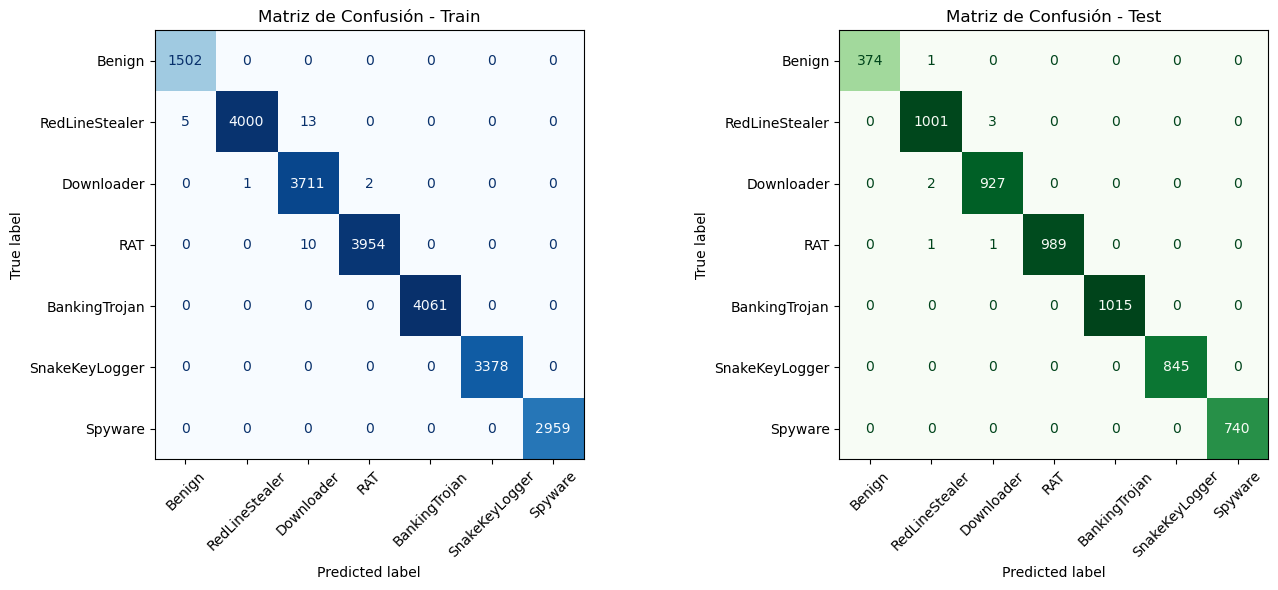

In [107]:
labels_clases = ['Benign', 'RedLineStealer', 'Downloader', 'RAT', 'BankingTrojan', 'SnakeKeyLogger', 'Spyware']

y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

# Matrices de confusión
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

fig, axs = plt.subplots(1, 2, figsize=(14,6))

# Mostrar matriz de confusión train
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=labels_clases)
disp_train.plot(ax=axs[0], cmap='Blues', colorbar=False)
axs[0].set_title('Matriz de Confusión - Train')
axs[0].tick_params(axis='x', rotation=45)

# Mostrar matriz de confusión test
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=labels_clases)
disp_test.plot(ax=axs[1], cmap='Greens', colorbar=False)
axs[1].set_title('Matriz de Confusión - Test')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Curvas ROC

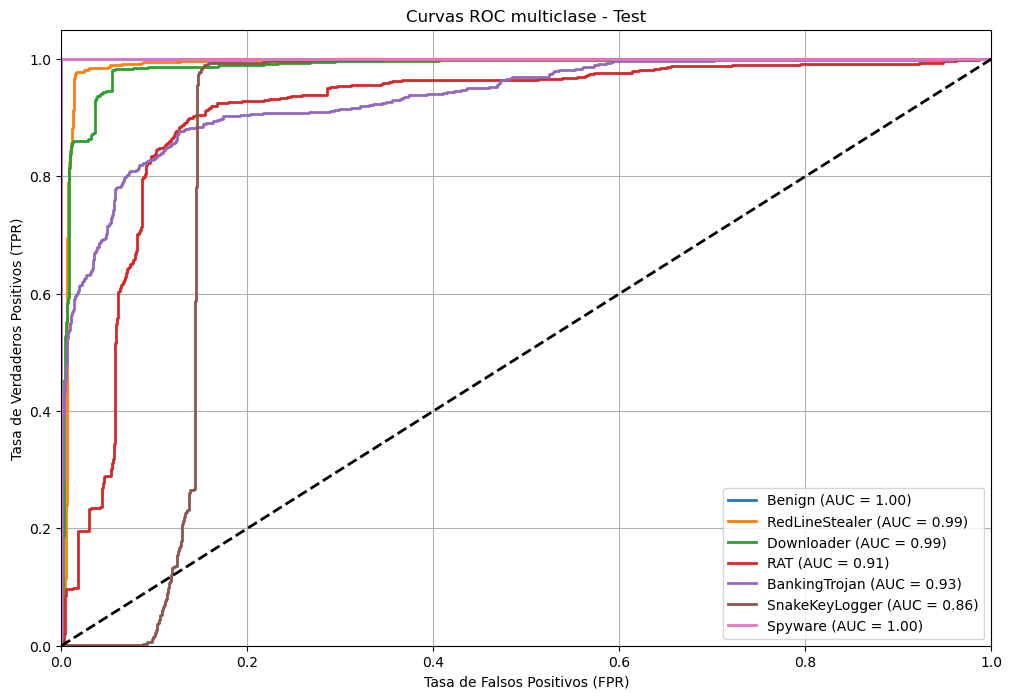

In [158]:
# Binarizar etiquetas (0 a 6)
y_train_bin = label_binarize(y_train, classes=np.arange(len(labels_clases)))
y_test_bin = label_binarize(y_test, classes=np.arange(len(labels_clases)))

# Usar OneVsRestClassifier con el modelo base para poder obtener decision_function para todas las clases
ovr = OneVsRestClassifier(lr_model)
ovr.fit(X_train_scaled, y_train_bin)

# Obtener scores para test
y_score_test = ovr.decision_function(X_test_scaled)

plt.figure(figsize=(12, 8))

dict_auc = {}
for i in range(len(labels_clases)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_test[:, i])
    roc_auc = auc(fpr, tpr)
    dict_auc[labels_clases[i]] = [roc_auc]
    plt.plot(fpr, tpr, lw=2, label=f'{labels_clases[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # línea diagonal para referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC multiclase - Test')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [172]:
pd.DataFrame.from_dict(dict_auc, orient='index', columns=['AUC'])

,AUC
Benign,1.000000
RedLineStealer,0.991769
Downloader,0.986858
RAT,0.909494
BankingTrojan,0.934507
SnakeKeyLogger,0.861123
Spyware,1.000000


### Conclusiones del modelo

Los modelos entrenados muestran una clara mejora en precisión cuando se aplica escalado a las características. El modelo con escalado alcanzó un accuracy del 99.86%, comparado con 48.06% y 41.40% en los modelos sin escalado o sin balanceo respectivamente.

Esta mejora puede atribuirse a la sensibilidad del algoritmo a la escala de las variables, que afecta la convergencia y el aprendizaje. Además, el tiempo de entrenamiento y predicción se redujo considerablemente en el modelo escalado, lo cual es crítico para entornos SOC donde la eficiencia y rapidez son esenciales.

Sin embargo, un accuracy tan alto puede indicar sobreajuste. Al comparar la precisión en los datos de entrenamiento y prueba, se observó una diferencia mínima (0.9987 vs 0.9986), sugiriendo que el modelo generaliza adecuadamente, aunque se recomienda realizar validación cruzada para confirmar su robustez.

La validación cruzada arrojó una media de accuracy de 0.9972 con desviación estándar 0.0003, confirmando la estabilidad del modelo.

Estos resultados resaltan la importancia del preprocesamiento y validación rigurosa al implementar modelos de clasificación de malware, para asegurar que sean útiles y confiables en operaciones reales.